In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from skimage import transform

In [5]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

C:\Users\enven\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Text(0.5,0,'Price')

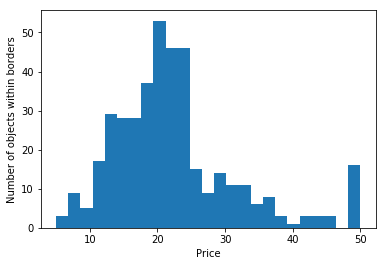

In [6]:
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

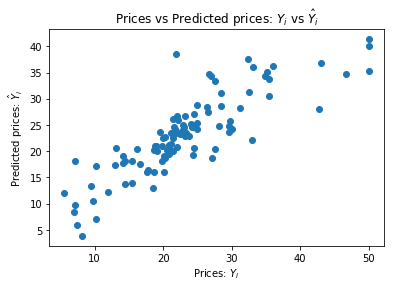

In [8]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [9]:
print('mae = {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse = {}'.format(mean_squared_error(y_test, y_pred)))
print('prediction variance = {}'.format(np.std((y_test - y_pred)**2)))

mae = 3.464185812406724
mse = 23.195599256422998
prediction variance = 45.78048685033721


In [10]:
N = len(X_train)
cycles = 20

mean_absolute_errors = np.zeros(len(X_train))  #Задаем массивы, в которых будем хранить выходные данные
mean_squared_errors = np.zeros(len(X_train))
prediction_variances = np.zeros(len(X_train))
r2 = np.zeros(len(X_train))
disp_mae = np.zeros(len(X_train))
disp_mse = np.zeros(len(X_train))
disp_r2 = np.zeros(len(X_train))

for j in range(1, N): #В каждом повторении цикла будем брать j значений из выборки
    r21 = np.zeros(len(X_train)) #Вспомогательные массивы для вычислений
    r22 = np.zeros(len(X_train))
    mae = np.zeros(len(X_train))
    mae2 = np.zeros(len(X_train))
    mse = np.zeros(len(X_train))
    mse2 = np.zeros(len(X_train))
    for i in range(cycles): #Для сбора статистики недостаточно одного цикла, считаем для j значений выборки cycles раз
        elem = rd.sample(range(j), j)
        lm.fit(X_train[elem], y_train[elem])
        y_pred = lm.predict(X_test)
        mean_absolute_errors[j] += mean_absolute_error(y_test, y_pred)
        mean_squared_errors[j] += mean_squared_error(y_test, y_pred)
        prediction_variances[j] += np.std((y_test - y_pred)**2)
        mae += mean_absolute_error(y_test, y_pred) #Собираем информацию внутри циклов для подсчета средних значений и дисперсий
        mse += mean_squared_error(y_test, y_pred)
        r21 += r2_score(y_test, y_pred)
        mae2 += mean_absolute_error(y_test, y_pred)**2
        mse2 += mean_squared_error(y_test, y_pred)**2
        r22 += r2_score(y_test, y_pred)**2
    r2[j] = r21[j]/cycles
    disp_mae[j] = mae2[j] / cycles - (mae[j] / cycles)**2 #Считаем
    disp_mse[j] = mse2[j] / cycles - (mse[j] / cycles)**2
    disp_r2[j] = r22[j] / cycles - (r21[j] / cycles)**2
mean_absolute_errors /= cycles
mean_squared_errors /= cycles
prediction_variances /= cycles
#plt.plot(np.arange(1, len(X_train) + 1), mean_absolute_errors)
#plt.plot(np.arange(1, len(X_train) + 1), mean_squared_errors)
#plt.plot(np.arange(1, len(X_train) + 1), prediction_variances)
#plt.plot(np.arange(1, len(X_train) + 1), r2)

Text(0,0.5,'mean absolute error dispersion')

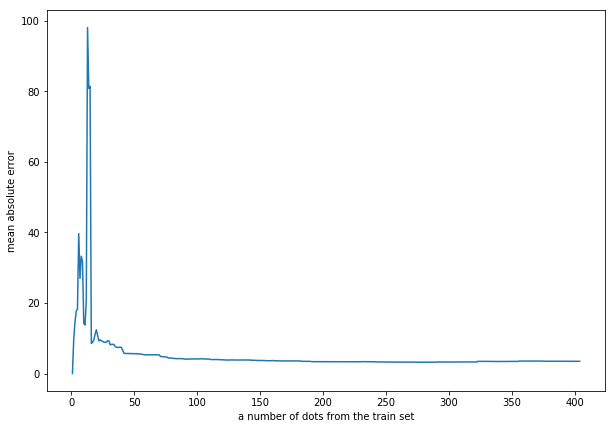

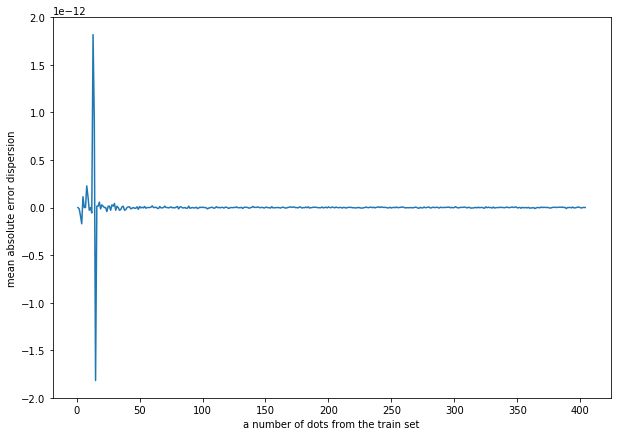

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, len(X_train) + 1), mean_absolute_errors)
plt.xlabel("a number of dots from the train set")
plt.ylabel("mean absolute error")

plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, len(X_train) + 1), disp_mae)
plt.xlabel("a number of dots from the train set")
plt.ylabel("mean absolute error dispersion")

Text(0,0.5,'mean squared error dispersion')

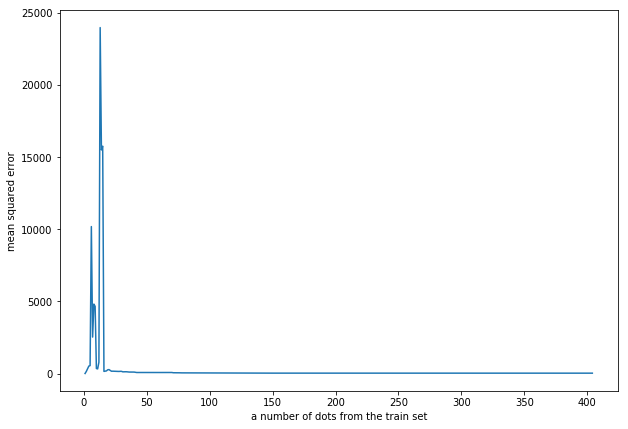

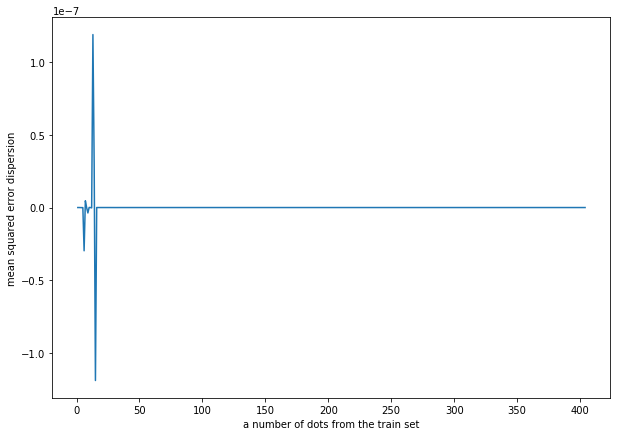

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, len(X_train) + 1), mean_squared_errors)
plt.xlabel("a number of dots from the train set")
plt.ylabel("mean squared error")

plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, len(X_train) + 1), disp_mse)
plt.xlabel("a number of dots from the train set")
plt.ylabel("mean squared error dispersion")

Text(0,0.5,'r2 dispersion')

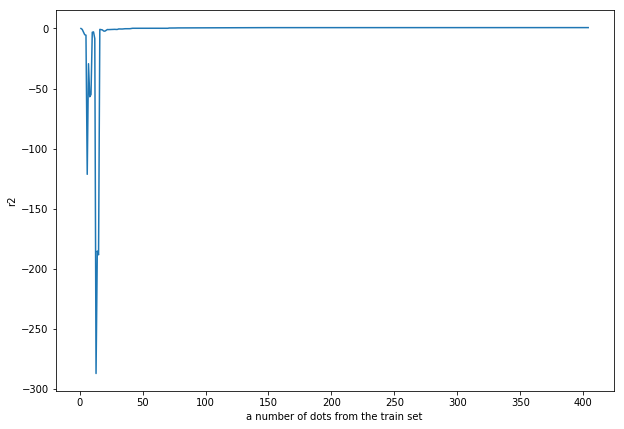

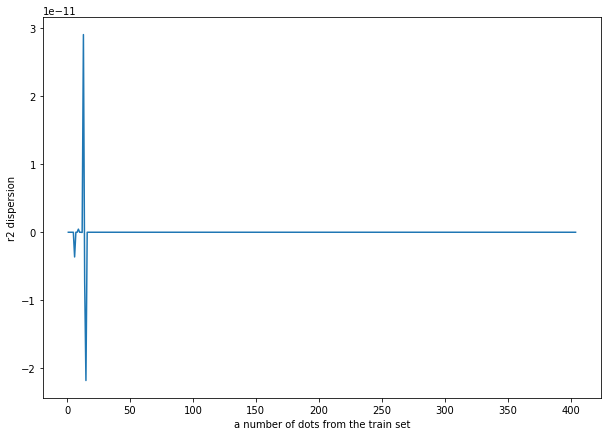

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, len(X_train) + 1), r2)
plt.xlabel("a number of dots from the train set")
plt.ylabel("r2")

plt.figure(figsize=(10, 7))
plt.plot(np.arange(1, len(X_train) + 1), disp_r2)
plt.xlabel("a number of dots from the train set")
plt.ylabel("r2 dispersion")

# Вывод: 
При малых количествах данных для выборки наблюдаем ухудшение качества решения задачи линейной регрессии

In [65]:
features = 12
for k in range(features - 1):
    fch = rd.sample(range(features), k + 1)
    X_train1 = X_train
    X_test1 = X_test
    for d in range(k + 1):
        X_train1 = np.delete(X_train1, (fch[d]), axis=0)
        X_test1 = np.delete(X_test1, (fch[d]), axis=0)
    lm.fit(X_train1, y_train) 
    predictions = lm.predict(X_test1)
    plt.scatter(y_test, predictions)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

    

ValueError: Found input variables with inconsistent numbers of samples: [403, 401]